# Module 2: Storing Data

## Introduction
This module introduces key concepts and principals surrounding the storage of data.  

## Learning Outcomes

In this module, you will:
* Explore different paradigm of modelling real world data  
* Understand the benefits and challenges of storing data using different type of data stores 
* Determine which stores are best suited for certain applications
* Become familiar with the basics of MongoDB
* Perform basic operations in MongoDB

This module consists of 2 parts:

**Part 1** - Storing Data<br>
**Part 2** - MongoDB

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

## Readings and Resources

We invite you to further supplement this notebook with the following recommended texts.

> Beaulieu, A. (2009). Learning SQL, 2nd Edition.  O’Reilly: Boston. 
http://shop.oreilly.com/product/9780596520847.do

> Chodorow, K. and Bradshaw, S. (2018). MongoDB: The Deﬁnitive Guide, 3rd Edition. O’Reilly: Boston. http://shop.oreilly.com/product/0636920049531.do 

> Kleppmann, M. (2017). Chapter 2: Data Models and Query Languages; Chapter 3: Storage and Retrieval in Designing Data Intensive Applications in Designing Data Intensive Applications. O’Reilly: Boston. http://shop.oreilly.com/product/0636920032175.do
 
> Segaran, T., Evans, C., and Taylor, J. (2009).  Chapter 4: Just Enough RDF, Chapter 5: Sources of Semantic Data, and Chapter 6: What Do You Mean, “Ontology”? in Programming the Semantic Web. Build Flexible Applications with Graph Data. O’Reilly: Boston.  http://shop.oreilly.com/product/9780596153823.do

> Webber, J., Robinson, I., and Eifrem, E. (2013). Graph Databases.  O’Reilly: Boston. http://shop.oreilly.com/product/0636920028246.do


## The Relational Model

Describing real world data is complicated.  The challenge is defining a paradigm to describe real world data in a way that can be easily processed and consumed.  The relational model is one such paradigm that was proposed by Edgar Codd back in 1970 while working at IBM (Icons of Progress).  Relational databases like DB2, Oracle, and many more implementations have adopted the relational model to store **structured** data.  ***Structured data*** *represents a form of data that is well organized and can be easily understood by machines*.  

To help describe real world data, we can define the following concepts:

* **Entity** – A person, place or thing that is made up of attributes that describes the entity. E.g., a car can have properties like color, model, year, etc; a person can have properties like first name, last name, age, etc.
* **Key** – An attribute on an entity that uniquely identifies one entity from another.  E.g., a bank account number uniquely identifies a bank account, a VIN number uniquely identifies a car, SIN number identifies a person.
* **Relationship** - Describes the connection between entities; e.g., Bob owns a 2018 Tesla S3.   Relationships reference entities by using their key values.  This allows us to describe all possible relationships between two entities. (We can use Bob’s driver’s license number to identify Bob, and the VIN number to identify the particular 2018 Tesla S3 car.)  
* **Constraint** - describes a set of rules on Entities, Keys or Relationships.  For example, a person must have a first name; a car must have a VIN number; a VIN number must be unique; only people can own a car; a house cannot own a car, etc. Constraints help enforce data integrity.

In the relational model, data is organized as relations.  A **relation** is made up of set of tuples where each tuple has a set of attributes.  In a relational database, a relation is represented as a table with rows and columns.  

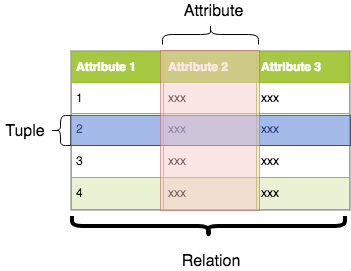

As you can see in the image above, each row represents a structured entity, while each column represents an attribute of that entity.  For example, we can define a person as having a last name and a first name (see image below).  We can store this information in a table with three columns.  One column represents a unique key while the other two columns represent the first and last name.  Each row in the table represents a particular person. 

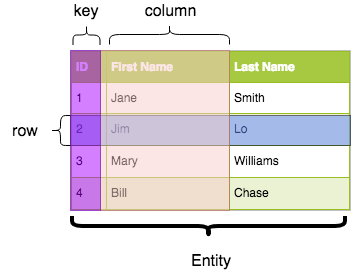

Now let’s say we want to store car information for each person.  We can define a second table that stores car information and use the unique keys (i.e. ID and VIN) to connect a person to a car as shown below. 

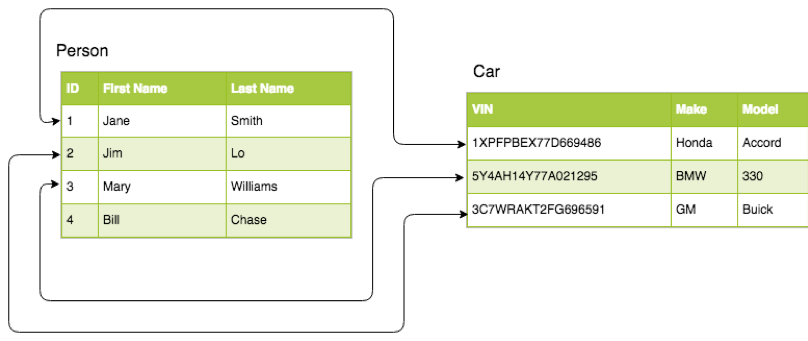

In the image above, notice that we have modelled a 1-to-1 relationship between Person and Car (arrows link one person from table 1 to one car in table 2).  What if want to model a many-to-many relationship?  A car can have multiple owners and an owner can own multiple cars.  We can define a third table, called a **junction** table to model the many-to-many ownership relationship as seen below.  ***Junction tables or associated tables*** *connect two or more tables together by referencing the primary keys of each connecting table*.

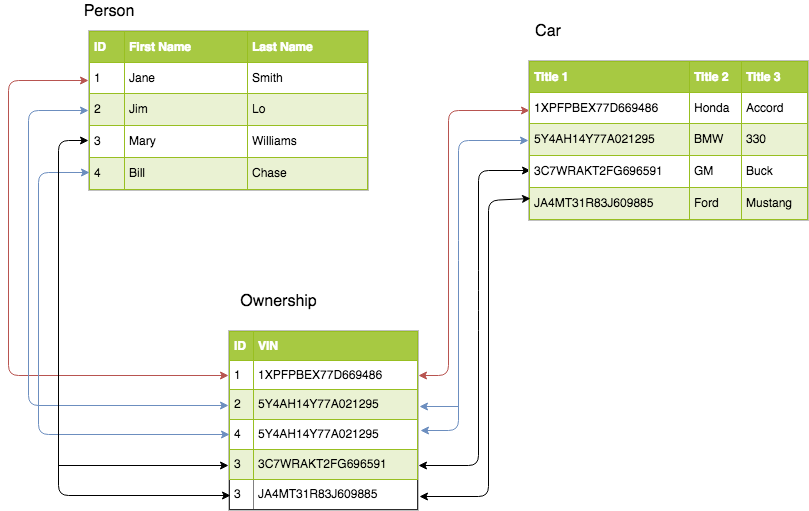

The junction table in the above example takes the key from table 1 (person ID - 1, 2, 3 or 4) and combines it with the ID key from table 2 (the VIN). Notice it shows that Mary owns the GM and the Ford car, while Jim and Bill both own the same BMW. Because the BMW is owned by two people, there are two entries in table 3 for it – one associated with person 2 (Jim) and the other associated with person 4 (Bill). 

Creating a well-designed relational database schema to accurately represent real world data is a challenge.  In addition, we must be aware of the kinds of datastore optimizations we want for our application.  In some cases, we want a schema that is optimized to minimize storage space, while in other cases we want to optimize for read access or for write access.

There are many books and techniques that have been written to help practitioners design relational database schemas.   One such technique is **database normalization**.  ***Database normalization*** *defines a set of rules called normalized forms that help reduce data redundancy and improve data integrity*.  If you are interested in further reading, see:https://en.wikipedia.org/wiki/Database_normalization)


### Structured Query Language (SQL)
Now that we have a method of modelling our data (the relational model), we need a language to query that data.   SQL is a declarative language that allows us to express queries to store, manipulate and retrieve data from a relational database. 
#### CRUD Operations
Some basic operations that are performed by SQL include **CRUD** operations such as:
* **C**reate
* **R**ead
* **U**pdate
* **D**elete

The SQL syntax defines the following directives to carry out CRUD operations are:
* **Clauses** defines directives that filter, order and aggregate data,
* **Expressions** define a formula that evaluate to a value, 
* **Predicate** is a function that evaluates to either true or false,
* **Statement** is a combination of clauses, expressions and predicates that are used to manage data or schemata by controlling transaction, program flow, connections, sessions, or diagnostics, and
* **Queries** are statements that perform CRUD operations.

The following diagram illustrates the syntax of a SQL statement.

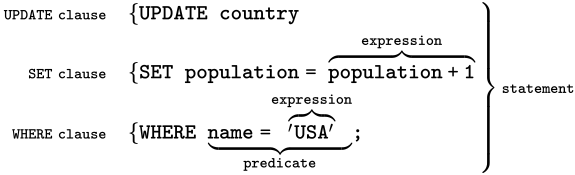[SQL syntax. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/SQL_syntax]

### Transactions
Transactions help database systems achieve both data consistency and availability.  A transaction is a unit of work that can be made up of one or more operations.  For example, let’s say I have a datastore that stores a list of names and I want to change each name by capitalizing the first letter.  I can define a transaction that is made up of two CRUD operations.  I first *READ* the name from the datastore, and then *UPDATE* the datastore with the capitalized name.  The **ACID** paradigm defines the behavior of a transaction.

### ACID transaction behaviours or properties
ACID defines four transaction behaviors that have a direct effect on the data consistency and availability of the datastore.  Datastores that adopt the ACID paradigm are more focused on keeping the data consistent and less focused on making the data available. 

**Atomicity** implies that each transaction is guaranteed to completely succeed or completely fail.  Therefore, given a transaction with 2 operations, if the first operation fails the entire transaction fails and the second operation does not occur.  It’s an all or nothing paradigm.  
When designing your datastore schema you can define rules that are enforced when executing a transaction.  For example, a schema rule can be defined to indicate that all names stored in the datastore must be unique.  If a transaction tries to create a name that already exists in the datastore the transaction will fail.  This ensures the integrity of the data.

**Consistency** ensures that a transaction can only bring the database from one valid state to another, maintaining database invariants: any data written to the database must be valid according to all defined rules, including constraints, cascades, triggers, and any combination thereof. This prevents database corruption by an illegal transaction, but does not guarantee that a transaction is correct.

**Isolation** addresses the possibility of multiple transactions happening at the same time. For example, two different transactions could be writing to the same database at the same time. Isolation ensures that concurrent execution of transactions leaves the database in the same state that would have been obtained if the transactions were executed sequentially. 

**Durability** guarantees that once a transaction has been committed, it will remain committed even in the case of a system failure (e.g., power outage or crash).

Many datastores use locks to process transactions with ACID capabilities.  Consider when two update transactions are serviced.   A lock on the datastore will be acquired by one of the transactions.  The transaction that acquires the lock is the only transaction that has permission to modify the datastore.  The second transaction must wait for the first transaction to complete.  Only then will the lock be released and the second transaction can acquire it.  Notice that the datastore is only available to one transaction at any time.  The second transaction must wait for the datastore to become available.  There are different locking strategies that the datastore can utilize.  Each strategy has different levels of data availability and consistency.  If you are interested in further reading, see: https://en.wikipedia.org/wiki/Isolation_(database_systems)

## Data Warehouses versus Operational Data Stores
Organizations continually collect enormous amounts of data over time.  Moreover, this data is spread across different divisions in disparate data sources.  The challenge is for organizations to make this data available to be used by business operations, analysis and reporting.  Both data warehouses and operational data stores are used by organizations to address these challenges.

An **operational data store (ODS)** is a type of database that consumes information from different data sources within the organization.  It serves as short-term storage that contains the most updated snapshots.  Organizations use ODS to perform simple queries on small datasets to handle daily operational and reporting needs.  

In contrast, **data warehouses** provide longer term storage that contains historical data.  This provides organizations with a means to run complex, long running queries without affecting daily operations.  To provide a consistent view of the data, data is organized in a hierarchical group of tables called the **star schema**.  The data is separated into either a fact or dimension table.  Fact tables stores attributes that are measurable like price and height.  While dimension tables store attributes like product name and product category.  The following illustrates an example star schema that represents sales information.

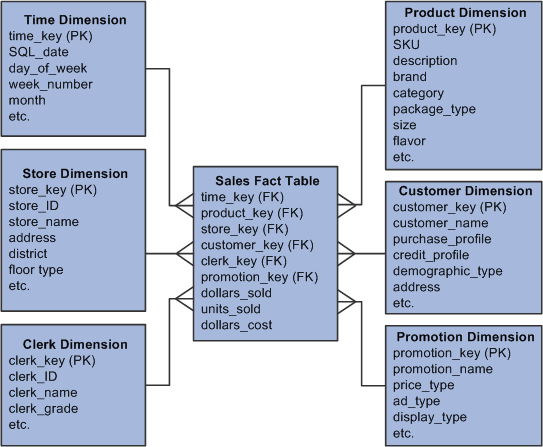 [Star Schema Example, https://docs.oracle.com/cd/E41507_01/epm91pbr3/eng/epm/penw/concept_MultidimensionalWarehouseMDW-9912e0.html]

ODS and data warehouses works together to provide an organizational data solution.  The following illustrates a simple architecture to show how this is possible.

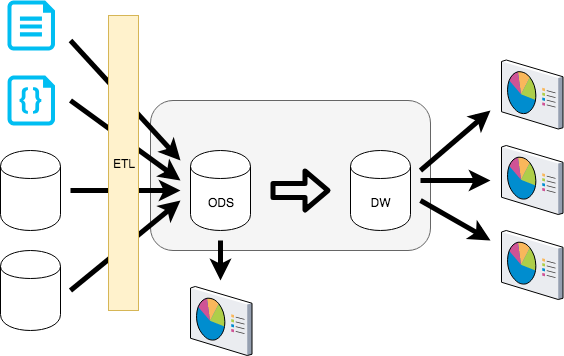

As shown in the image above, ODS consumes data from different sources across different departments.  The data undergoes some form of **ETL** procedure so that it can be consumed by ODS in a consistent format.   ***ETL*** *stands for Extract, Transform and Load, a process for transferring data from one data source to another*.  The data lives in ODS temporarily. Periodically, ODS data is archived to a data warehouse store.  

The following table outlines the properties of data warehouses and operational data stores (ODS).

| Data Warehouse | Operational Data Stores (ODS) |
|-------------|-----------|
| Long term storage | Short term storage |
| Provides a consistent view of the organizational data | Provides a consistent view of the organizational data |
| Used to run long running complex queries to produce off-line reports | Used to run simple queries on small datasets to provide real-time analysis and reporting |
| Stores historical data | Stores current snapshot of data |
| Consumes data from ODS | Consume data from different data sources |
| Data is updated periodically.  In some cases, nightly or weekly | Data is frequently updated |


## Trends/Forces driving Database Models 

Over the years, there have been many advancements in academia and industry that have pushed the limits of technologies.  Memory storage is cheaper, smaller and faster.  
This has given rise to technologies such as IoT, AI, computer visions, social networking, and blockchain just to name a few.  

We are recording every aspect of our daily lives as we interact with personal assistants, update our social media, buy products on the internet, or watch streaming video.   Furthermore, with the proliferation of the internet, data is accessible to millions of users around the world.

These new applications focus on processing large volumes of data rapidly and making the data available at scale in a reliable manner.  Unfortunately, traditional models such as the relational model, are not suitable for these new applications.   This has compelled the industry to come up with alternative database models such as **NoSQL**.

### NoSQL
NoSQL is a broad term to describe a database system that does not conform to the relational model.  Thus, many different databases can be considered NoSQL databases.  Generally speaking, a NoSQL database system is associated with one or more of the following characteristics.
* Non-Relational
* Schema Less (no fixed data structure)
* Horizontally Scalable
* No Standard Query Language
* Loosely adheres to ACID properties

We will explore some of the main NoSQL databases that have emerged within the industry.
* Column-Oriented Stores
* Document-Oriented Stores
* Object Stores
* Graph Stores
* Triple Stores

### Column-Oriented Stores
Column-oriented stores were originally developed by Google to address the need to store and index the vast amount of data that exists on the internet.  You can image the amount of scale required to serve that much data to millions of users around the world.  

### Organizing the Data
Column-oriented stores arranges data by column instead of rows.  Consider the following table that represents a list of people.  Each row represents a person.

| ID | First Name | Last Name | Gender | Job Title | Department
|----|----|----|----|----|----|
| 1 | Peggy | Wotring | F | Manager | Marketing |
| 2 | Cleo | Holliman | M | Manager | Finance |
| 3 | Malisa | Ide | F | Engineer | IT |
| 4 | Rosemarie | Vigo | F | Manager | Marketing |
| 5 | Dewey | Fenton | M | Manager | Finance |

We can change the table by rearranging the data by column.  Notice each column represents a person while each row represents an attribute.

| 1 | 2 | 3 | 4 | 5 |
|-----|-----|-----|-----|-----|
| Peggy | Cleo | Malisa | Rosemarie | Dewey |
| Wotring | Holliman | Ide | Vigo | Fenton |
| F | M | F | F | M |
| Manager | Manager | Engineer | Manager | Manager |
| Marketing | Finance | IT | Marketing | Finance |


Column-oriented stores take advantage of this arrangement and separates out each column attribute in their own partition in the following figure.   Each partition represents separate disk storage.  Thus, a large dataset can be distributed across many disks, and the query load can be distributed across many processors.

Note that the IDs reference the position of each attribute.  Thus, all attributes associated with ID 1 represents “Peggy Wotring”.


<table width="100%" bgcolor="#FFFFFF"><tr><td></td><td></td><td></td><td></td><td></td></tr><tr>
    <td>       
        <table border="1" bgcolor="#FFFFFF">
            <td colspan=2><b>First Name</b></td>
            <tr><td>1</td><td>Peggy</td></tr>
            <tr><td>2</td><td>Cleo</td></tr>
            <tr><td>3</td><td>Malisa</td></tr>
            <tr><td>4</td><td>Rosemarie</td></tr>
            <tr><td>5</td><td>Dewey</td></tr>
        </table>
    </td>
    <td>
        <table>
            <td colspan=2><b>Last Name</b></td>
            <tr><td>1</td><td>Wotring</td></tr>
            <tr><td>2</td><td>Holliman</td></tr>
            <tr><td>3</td><td>Ide</td></tr>
            <tr><td>4</td><td>Vigo</td></tr>
            <tr><td>5</td><td>Fenton</td></tr>
        </table>
    </td>
    <td>
        <table>
            <td colspan=2><b>Gender</b></td>
            <tr><td>1</td><td>F</td></tr>
            <tr><td>2</td><td>M</td></tr>
            <tr><td>3</td><td>F</td></tr>
            <tr><td>4</td><td>F</td></tr>
            <tr><td>5</td><td>M</td></tr>
        </table>
    </td>
    <td>
        <table>
            <td colspan=2><b>Job Title</b></td>
            <tr><td>1</td><td>Manager</td></tr>
            <tr><td>2</td><td>Manager</td></tr>
            <tr><td>3</td><td>Engineer</td></tr>
            <tr><td>4</td><td>Manager</td></tr>
            <tr><td>5</td><td>Manager</td></tr>
        </table>
    </td>
    <td>
        <table>
            <td colspan=2><b>Department</b></td>
            <tr><td>1</td><td>Marketing</td></tr>
            <tr><td>2</td><td>Finance</td></tr>
            <tr><td>3</td><td>IT</td></tr>
            <tr><td>4</td><td>Marketing</td></tr>
            <tr><td>5</td><td>Finance</td></tr>
        </table>
    </td>
    <td>    
    </tr>
</table>

### Compression

In many cases, attributes have duplicate values.  In our example, we can observe a set of distinct values for gender, job title and department.  Imagine storing millions of people in our datastore.  The department partition will contain millions of entries with either ‘Marketing’, ‘IT’ or ‘Finance’.  There’s a lot of duplications that we can remove to reduce the storage footprint of the partition.  One such compression algorithm that can be used, is bitmap encoding.  Consider the following column information for department with 10 entries.

| Position | Department |
|---|-----------|
| 1 | Marketing |
| 2 | Marketing |
| 3 | Marketing |
| 4 | IT |
| 5 | Marketing |
| 6 | Finance |
| 7 | Finance |
| 8 | Marketing |
| 9 | IT |
| 10 | IT |

We can encode the position of each distinct value of the department attribute as follows.

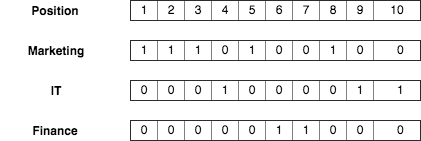

We encode a 1 when the value appears in a position otherwise we encode a 0.  Notice the “Marketing” value is associated with position 1, 2, 3, 5, and 8.  Therefore, we place a 1 in those position and 0 in the other positions.  We can further compress this information by noting the consecutive ones and zeros as follows:

| Attribute Value | Encoding | Sequence |
|-------|-------|--------|
| Marketing | 0,3,1,1,2,1,2 | 0 zeros, 3 ones, 1 zero, 1 one, 2 zeros, 1 one, 2 zeros |
| IT | 3,1,4,2 | 3 zeros, 1 one, 4 zeros, 2 ones |
| Finance | 5,2,3 | 5 zeros, 2 ones, 3 zeros |

Notice that the 10 records are compressed to 3 entries.  We can do the same when dealing with millions of records.  That is, we can reduce the millions of entries down to 3 entries of consecutive 1’s and 0’s.  Compression allows column-oriented database to achieve high capability when storing millions or even billions of records.

As we’ve seen, column-oriented datastores arrange data in sparse separate partitions.  Each of these partitions can be compressed to handle large amounts of data.  This makes column-oriented databases less I/O intensive for queries that only require a subset of attributes.  Operational and analytic applications are good candidates to use column-oriented stores since most of their queries work off a subset of attributes and the amount of data can be vast.  Consider the following queries that work off our example:
* Find the number of females?
* Find the number of managers?
* How many female managers are working in the Marketing department?
Notice that finding the number of females only requires reading the Gender partition.  The query doesn’t need to load the other partitions.  

The following are some of the main implementations of column-oriented databases in the industry:
* Bigtable
* HBase
* Cassandra

## Document-Oriented Stores
Document-oriented data stores are a form of NoSQL data store that is used to store semi-structured data.  As a result, the database schema does not have to follow a strict structure.  

Document-oriented data stores represents data as documents that can be encoded in different formats such as PDF, XML, JSON or Microsoft Word.  Each document contains a list of key value pairs that represents different attributes of the data.  Consider the following JSON representation of a Person with 4 key value pairs.

```JSON
{
    firstname: “Blake”,
    lastname: “Jackson”,
    age: “23”,
    sports: [“hockey”,“baseball”, “soccer”]
}
 ```
 
Notice that the sports attribute is a multi-valued attribute that is represented by an array.  Documents can also have embedded document to model more richer data.  This is shown in the following JSON example that highlights an embedded document.  

<font face="courier">&nbsp;&nbsp;&nbsp;&nbsp;{<br></font>
<font face="courier">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;firstname: “Blake”,<br></font>
<font face="courier">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;lastname: “Jackson”,<br></font>
<font face="courier">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;age: “23”,<br></font>
<font face="courier">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;sports: [“hockey”, “baseball”, “soccer”],<br></font>
<font face="courier" color='red'><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;address: {<br></b></font>
<font face="courier" color='red'><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;street_no: 232,<br></b></font>
<font face="courier" color='red'><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;street: “Cardinal St.”,<br></b></font>
<font face="courier" color='red'><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;city: “Toronto”,<br></b></font>
<font face="courier" color='red'><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;province: “ON”<br></b></font>
<font face="courier" color='red'><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;postal_code: "M2F8E2"<br></b></font>
<font face="courier" color='red'><b>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;}<br></b></font>
<font face="courier">&nbsp;&nbsp;&nbsp;&nbsp;}<br></font>


Document-oriented databases organize documents in collections.  Collections are analogous to tables in a relational database.  However, collections can hold documents that have different structures.    This is very beneficial when your data doesn’t have a formalized structure.  Consider addresses have different structures depending whether the person lives in an apartment or lives in different countries.  Apartments will have a suite number while addresses in Canada have postal codes compared to addresses in U.S. that have zip codes.  We can represent a collection of addresses documents with different structures.

![DocumentOrientedJSON3.png](attachment:DocumentOrientedJSON3.png)

Every document has a document ID that uniquely identifies the document within the collection.  Document oriented stores will create an index on the document ID to speed up document retrieval.  The following shows the comparison between the Relational Model and document-oriented Datastores

| Relational Model | Document-oriented Datastore |
|------------------|-----------------------------|
| Table | Collection |
| Row | Document |
| Column | Key |
| Primary Key | Document ID |

Document-oriented datastores are also flexible when defining relationships between documents.  Document can either embed another document or reference an external document by their document ID. 

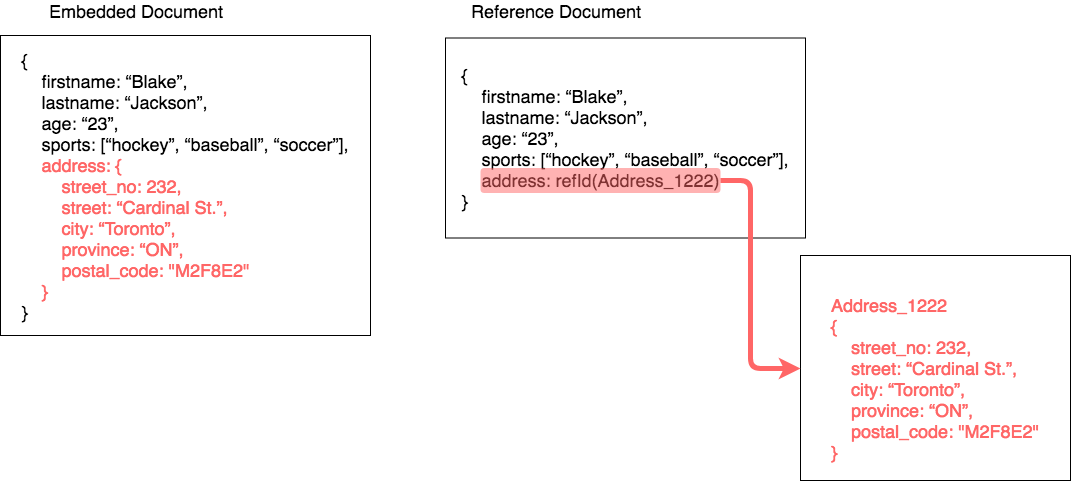

### Consistency and Availability
Documented-oriented datastores are designed to scale.  This is achieved by replicating data across multiple systems.  Thus, if one system goes down, requests to access the data can be routed to another system making the overall system fault tolerant.  Moreover, each replica does not have to be mutually consistent at any time.  This makes it easy for systems to service requests when data is being modified.  Document-oriented datastores adopt the eventual consistency model where a change made in one of the replicas will be replicated across the system over time.  We will touch on these concepts and principals in more detail in later in this course.

As a result, unlike relational databases, documented-oriented datastores are more focused on making the data available and less focused on making the data consistent.  There are many different implementations of document-oriented datastore.  The following are some of the main implementations of documented-oriented databases in the industry:
* MongoDB
* Cloud Firestore
* Apache CouchDB

## Object Stores

Many modern applications are developed using object-oriented programming languages.  In order to store data, an application must transform this object-oriented model to a model that the datastore can understand.  For example, to store the data in a relational database, the application must translate the object model to relational tables consisting rows and columns.  Similarly, to store the data in a document store, the application must convert the object-oriented model to documents.  The additional step to converting the data from one type of model (object-oriented model) to another type of model (relational, document-oriented, column-oriented, etc.) can add additional processing on the application.  Furthermore, concepts that are represented in one model may not have an equivalent representation in another model.  As a result, the translation process can be difficult, and in some cases, information could be lost when transforming data from one model to another.  For example, there is no equivalent representation of object-oriented concepts such as inheritance, encapsulation and polymorphism in a relational model. This disconnect between models is called an **impedance mismatch**.

Object databases address the impedance mismatch conundrum by supporting concepts such as object identity, classes, inheritance, methods, encapsulation and extensibility (For more information on object-oriented concepts see https://en.wikipedia.org/wiki/Object-oriented_programming).  This allows object databases to have the following benefits over relational databases.

* **Complex Modelling** – Object databases are able to model more complicated data compared to other stores such as relational database, document-oriented or column-oriented stores.
* **Higher Performance** – Since the models are consistent there is no need for translations between the application layer and persistent layer.  This leads to efficient access to the datastore.
* **Maintainability** - Applications using object databases are easier to write and maintain because the application model and persistent model are consistent.

In spite of these benefits, object databases have not replaced the relational database as the de facto data store.  Part of the reason for the slow adoptions is the high cost of migrating data from a relational database to an object database.  Furthermore, there has been advancements in object-relational mapping tools and techniques for all major object-oriented languages.  Within the industry, object databases are either used to compliment relational databases or for niche applications such as in embedded devices and real-time systems.  Some of the implementations of object databases are as follows:
* Db4o
* ObjectDatabase++
* ObjectDB
* Objectivity/DB
* ObjectStore
* Caché

For further reading, see: https://en.wikipedia.org/wiki/Object_database

## Graph Stores
Graph data store is another NoSQL data store that was developed to address limitations of modelling complex hierarchical data.  It is based on concepts from mathematics’ graph theory where data is modelled as vertices, edges and properties.

* **Vertices** represent entities that contains a set of properties.  Vertices are comparable to rows in relational databases.
* **Edges** represents relationships between vertices that can be either directed or undirected.  Edges can also contain a set of properties that describes the relationship.
* **Properties** describes the attribute of a vertex or edge.

Graph datastores are a natural fit for representing social graphs.  Let’s look at representing a social graph for a person using vertices, edges and properties.

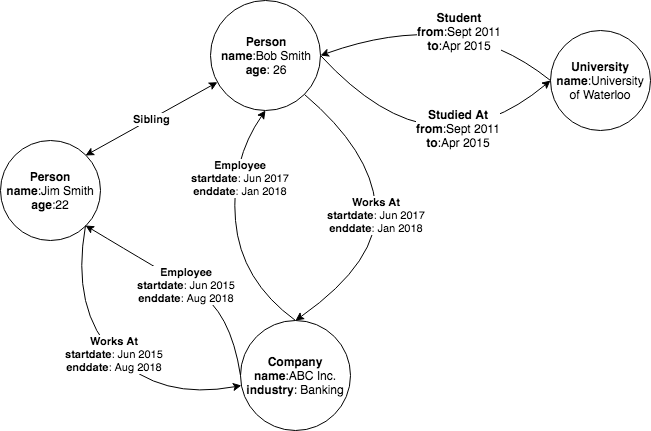

The above diagram shows that Bob Smith has a brother and was a student at the University of Waterloo from Sept 2011 to 2015.   He also worked for company ABC Inc. from Jun 2017 to Jan 2018.  Graph databases can easily model data that has a high number of relationships and cardinality.  Thus, a graph database is well-suited for:
* Object-oriented models 
* Complex hierarchical data such as social networks (e.g. relationships between people and organizations)
* Modeling computer system networks
* Modeling e-commerce data to model relationships between consumers and products 
* Useful for graph-based machine learning systems such as Google’s graph-based machine learning platform.

These applications make use of the following benefits of graph databases:
* **Vertices-Edge Philosophy** - It is easy to model data in certain problem domains.  This makes it easy to express and optimize queries for these domains.
* **Flexibility** – Nodes and relationships can be deleted or added to the graph model without compromising the existing data.  Compared to a relational model, the data would have to undergo a migration to support a new relationship between entities.  
* **Fast Relationship Queries** – queries that depend on relationships (e.g. find all people that work at company ABC) are fast compared to relational databases.  In a graph database there is no need to join tables which is an expensive operation in relational databases.  Furthermore, relationships are indexes which further contribute to the speed of the queries.

Some of the leading graph databases are:
* Neo4j
* Titan
* HyperGraphDB
* InfiniteGraph
* OrientDB
* dex

For further reading, see: https://en.wikipedia.org/wiki/Graph_database

## Triple Stores
A triple data store is a type of graph data store that uses the **Resource Description Framework (RDF)** to formalize the way to model data.  RDF was developed by [W3C](https://www.w3.org/Consortium/) to define a language for representing information for the Internet/Semantic Web.  RDF make it possible for everyone to share resources such as websites and other descriptions more easily.

At its core, RDF defines a construct called a **triple**.  A ***triple*** *is made up of a subject, predicate and object that is used to describe statements on a resource*.  Consider modeling “Alex works at Facebook” in a subject-predicate-object form.  We can break this statement as follows.

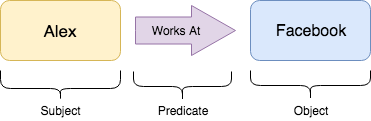

In this form, the subject, “Alex”, is linked to an object, “Facebook”, by its predicate, ”Works at”.  You can think of the subject as the entity, predicate as the attribute and the object as the value.  Therefore, if we want to model Alex’s age, we can define a subject, “Alex”, a predicate, “Age” and an object “25”.  The collection of triples forms the graph model where the subjects and objects are vertices and the predicates are the edges.

RDF also defines a schema language that provides a means to describe the structure of the RDF model.  For example, a schema can be defined that states only people can work at companies.  Similarly, we can define a schema that states only teachers can teach classes.  The schema defines constructs such as classes, literals, resources and datatypes.  The languages also define properties that are used to describe relationships between subject resources and objects resources such as “rdfs:subClassOf” and “rdf:type”.  By defining a set of schema rules, we can infer additional triples that provides additional insight into the data. 

Let’s look at modeling the relationship between a person and a dog.  In our schema we can define three classes: Mammal, Person and Dog.  We can also define two properties:  every Person is a Mammal, and every Dog is a Mammal.  Finally, we can define a property that states that only Persons can own Dogs.

In our RDF model we can define a triple that states Bob owns Lassie.  Based on our RDF schema we can infer the following additional triples.  
* Bob is a Human
* Bob is a Mammal
* Lassie is a Dog
* Lassie is a Mammal

W3C also defines a query language called SPARQL (see https://www.w3.org/TR/rdf-sparql-query/ for further reading) that allows users to query information from the triple datastore.  Similar to SQL, SPARQL defines a set of directives to perform the full set of CRUD operations.

As you can see from the example above, triple datastores improve the discovery of analytics through inference in addition to inheriting the benefits of graph data stores.  

Furthermore, since triple data stores follow an open standard, they have added benefits:
* Transferring data from one triple store to another is easy.
* Triple stores can be developed on top of existing data stores such as relational databases.  
* Queries can be federated across multiple data stores.

## Selecting Database Type 
There exist many problem domains with their own set of unique challenges.   Unfortunately, there is no one size fits all solution.  Practitioners must understand the problem they are trying to solve and the kinds of user experiences they want to provide.  Only then can they determine the technology and architecture to use.  This is particularly the case when determining the type of datastore to use and how the datastore schema should be designed.  There are some basic questions that practitioners can ask to select a type of database.

### Is the Data Structured, Unstructured, or Semi-Structured?
Can the data be described in a well-defined structure with no ambiguity?  Or is the data unstructured and not well organized, ambiguous, and irregular?    Examples of unstructured data are emails, audio and video files, text documents, webpages and most business data.  For these cases it may be suitable to select a datastore that has a flexible schema that can handle the ambiguity.  For data that is well structured a relational database may be a suitable datastore.  

Consider log data that is semi-structured data.  A log event is composed of a timestamp, log level, and a message that is not well structured.  Log systems can further parse the message to extract out more useful system information such as application name, process name, etc.  Organizations uses log data to determine the health of their systems.  A natural choice is to store log data in a column-oriented datastore such as HBase.  Analytic queries can be quickly executed since these queries only require a subset of attributes.  Furthermore, the datastore can be easily scaled to handle large volumes of log data.

### Which Model best describes your Data?
We have gone through many types of datastores with their own unique way of modelling data.  When going through the process of modelling your data by identifying entities, relationship and properties, a clear method of modeling the data will emerge.  For example, a graph database is a natural fit for modelling a social graph.  In contrast, one might consider an object database to store applications that are written in an object-oriented programming language.

### What is your Availability and Consistency Model?
Is our application more concerned with making the data available or more focused on making the data consistent?  In the case of storing bank funds we want to make sure that our data is consistent.  The amount of funds in your banking account must reflect the exact amount at all times especially during system failures.  In this case, we would want to use a datastore that uses ACID transactions.  If the system fails, the users are okay if they can’t access the data and more concerned that the data is consistent.  

In contrast, consider a social networking application like twitter.  Millions of users post small 280-character tweets to the site, while millions more read these tweets.  Thus, making the data available is more important than keeping the data consistent.  If the system goes down and users cannot read tweets, users will get frustrated with the bad user experience.  In this case we can use a datastore that will provide eventual consistency where data is replicated across many different partitions.  If one partition goes down, users can be redirected to another partition.   Furthermore, users are okay with the data eventually replicating to all the partitions.  For instance, a person living in Hong Kong can wait a few minutes to see updates from a person living in New York.  

We can keep asking more and more of these types of questions to understand how our data is used.  For example, we can further ask whether our application is write intensive or read intensive.   This understanding will help choose the type of datastore and help design our schema.


## End of Part 1

This notebook makes up one part of this module. Now that you have completed this part, please proceed to the next notebook in this module.

If you have any questions, please reach out to your peers using the discussion boards. If you and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to your instructor on the designated discussion board.


## References
Icons of Progress, IBM. (Public Domain). Retrieve from https://www.ibm.com/ibm/history/ibm100/us/en/icons/reldb/

Graph database. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Graph_database

Column-oriented DBMS. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Column-oriented_DBMS

Object-relational databases. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Object-relational_database

Operational data store. SearchOracle. (Public Domain). Retrieved from https://searchoracle.techtarget.com/definition/operational-data-store

Relational database. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Relational_database

SQL. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/SQL

Comparison of object database management systems. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Comparison_of_object_database_management_systems

Object database. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Object_database
Document-oriented database. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Document-oriented_database

Associative entity. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Associative_entity

SQL syntax. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/SQL_syntax

ACID. Wikipedia. (Public Domain). Consistency, Isolation and Durability definition. Retrieved from https://en.wikipedia.org/wiki/ACID_(computer_science)

Big table. Wikipedia. (Public Domain). Retrieved from https://en.wikipedia.org/wiki/Bigtable

Structured vs unstructured data. datamation. (Public Domain). Retrieved from https://www.datamation.com/big-data/structured-vs-unstructured-data.html

What Are the Major Advantages of Using a Graph Database? DZone. (Public Domain). Retrieved from https://dzone.com/articles/what-are-the-pros-and-cons-of-using-a-graph-databa

Resource Description Framework. Wikipedia. (Public Domain). Retrieved from   https://en.wikipedia.org/wiki/Resource_Description_Framework

RDF Schema. Wikipedia. (Public Domain). Retrieved from  https://en.wikipedia.org/wiki/RDF_Schema

A chart showing several of the SQL language elements that compose a single statement.  Wikipedia. (Public Domain). Retrieved from: https://wikimedia.org/api/rest_v1/media/math/render/svg/b0bfef3c941c1a88d3990bd1472653e60cf02d0a

Multidimensional Warehouse (MDW).  Oracle. (Public Domain). Retrieved from: https://docs.oracle.com/cd/E41507_01/epm91pbr3/eng/epm/penw/concept_MultidimensionalWarehouseMDW-9912e0.html